<a href="https://colab.research.google.com/github/nickfuryavg/Deep-Learning-Basics/blob/main/multiple_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()#

## this is used to create the hidden layer 3- hidden layer node , input_dim=11 <--- how many inputs are we geting
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))



## this is used to create the output layer as it has only one output node
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## compilation we will use optmizer "Adam" for gradient descent and loss function used is " log loss or binary crossentropy"


model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 694us/step - loss: 0.5252 - accuracy: 0.7698 - val_loss: 0.4700 - val_accuracy: 0.8075
Epoch 2/100
200/200 [==============================] - 0s 430us/step - loss: 0.4472 - accuracy: 0.8052 - val_loss: 0.4462 - val_accuracy: 0.8087
Epoch 3/100
200/200 [==============================] - 0s 417us/step - loss: 0.4309 - accuracy: 0.8094 - val_loss: 0.4378 - val_accuracy: 0.8062
Epoch 4/100
200/200 [==============================] - 0s 435us/step - loss: 0.4234 - accuracy: 0.8128 - val_loss: 0.4305 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 0s 420us/step - loss: 0.4175 - accuracy: 0.8178 - val_loss: 0.4253 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 0s 398us/step - loss: 0.4113 - accuracy: 0.8209 - val_loss: 0.4185 - val_accuracy: 0.8175
Epoch 7/100
200/200 [==============================] - 0s 430us/step - loss: 0.4049 - accuracy: 0.8259 - val_loss: 0.4122 - val_ac

In [ ]:
weights_first_layer = model.layers[0].get_weights()
weights_first_layer

[array([[-0.25640714,  0.40256903, -0.07276879, -0.13227732,  0.09241597,
         -0.18812525, -0.25591826,  0.14982025, -0.04927215, -0.06959281,
          0.02941689],
        [ 0.4086027 ,  0.2916978 ,  0.40831247,  0.38351882, -0.83422744,
          0.33041066, -0.69389725, -1.1582934 , -0.04561708,  0.8134805 ,
          0.01318699],
        [-0.03824024,  0.12230165,  0.103711  ,  0.10953564,  0.00788051,
          0.29567865,  0.24837326, -0.11465567, -0.25016382,  0.04860362,
          0.22073692],
        [-0.03133904, -0.05218009,  0.08218212, -0.3405476 , -0.14528276,
         -0.59252405, -0.60205954, -0.10656377, -0.62216574, -0.3938553 ,
         -0.06615761],
        [-0.06611923, -0.00825957,  1.2928814 ,  0.07224562, -0.10833571,
          0.05715023, -0.32292676,  0.1290956 , -1.0560219 , -0.09276845,
         -0.9057064 ],
        [-0.20366529,  0.23853248, -0.05197439,  0.25127524,  0.03639129,
          0.20164132, -0.50673026, -0.20096183, -0.01714462, -0.1209321

In [ ]:
weights_first_layer = model.layers[1].get_weights()
weights_first_layer

[array([[ 0.02169696, -0.2047292 , -0.08267343, -0.6127191 ,  0.66596174,
          0.06598005, -0.08208324, -1.1210892 ,  0.10544517,  0.09498902,
         -0.2948812 ],
        [ 0.06561862, -0.4003143 , -0.41697788,  0.22155412,  0.48350096,
         -0.05349869, -0.06789183, -0.3561332 ,  0.27345896,  0.5168376 ,
         -0.1911183 ],
        [ 0.05447328,  0.5475709 , -0.11949253,  0.58992577,  0.00496502,
         -0.94346476,  0.07272056,  0.6036481 ,  0.6117634 , -0.34605443,
          0.22966631],
        [-0.4023094 ,  0.2536518 , -0.03555894,  0.39761224,  0.27146795,
          0.30051503, -0.24476092, -0.12408025,  0.08080613,  0.45439985,
          0.09967506],
        [ 0.65874535, -0.30012098, -0.24058017, -0.0433877 ,  0.14807676,
         -0.66754425,  0.17557886,  0.00208543, -0.88806075, -0.20695293,
         -0.9981794 ],
        [-0.13354391, -0.6407664 , -0.072393  ,  0.08327372,  0.29122612,
          0.28043565,  0.53000265, -0.04497765,  0.6008831 ,  0.4922498

In [ ]:
weights_first_layer = model.layers[2].get_weights()
weights_first_layer

[array([[-0.6966081 ],
        [ 1.6335773 ],
        [-0.15518302],
        [ 0.6855699 ],
        [-0.5471577 ],
        [ 0.82819283],
        [-1.0949903 ],
        [ 1.952196  ],
        [ 0.9736693 ],
        [-0.9255329 ],
        [ 1.440602  ]], dtype=float32),
 array([-0.18543455], dtype=float32)]

In [ ]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 267us/step


array([[0.25665718],
       [0.28463784],
       [0.08125934],
       ...,
       [0.25084558],
       [0.16710225],
       [0.22116302]], dtype=float32)

In [ ]:
import numpy as np

# Assuming model is already trained and X_test_scaled is prepared
predictions = (model.predict(X_test_scaled) > 0.5).astype(int)

63/63 [==============================] - 0s 242us/step


In [ ]:
y_pred=predictions
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8595

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 477us/step - loss: 0.3187 - accuracy: 0.8692 - val_loss: 0.3563 - val_accuracy: 0.8637
Epoch 2/100
200/200 [==============================] - 0s 422us/step - loss: 0.3186 - accuracy: 0.8675 - val_loss: 0.3573 - val_accuracy: 0.8612
Epoch 3/100
200/200 [==============================] - 0s 406us/step - loss: 0.3191 - accuracy: 0.8695 - val_loss: 0.3571 - val_accuracy: 0.8581
Epoch 4/100
200/200 [==============================] - 0s 398us/step - loss: 0.3186 - accuracy: 0.8694 - val_loss: 0.3572 - val_accuracy: 0.8606
Epoch 5/100
200/200 [==============================] - 0s 398us/step - loss: 0.3183 - accuracy: 0.8697 - val_loss: 0.3574 - val_accuracy: 0.8600
Epoch 6/100
200/200 [==============================] - 0s 402us/step - loss: 0.3188 - accuracy: 0.8672 - val_loss: 0.3570 - val_accuracy: 0.8606
Epoch 7/100
200/200 [==============================] - 0s 398us/step - loss: 0.3182 - accuracy: 0.8684 - val_loss: 0.3568 - val_ac

In [ ]:
history.history

{'loss': [0.31873854994773865,
  0.3186262845993042,
  0.3190813362598419,
  0.31863126158714294,
  0.31832200288772583,
  0.31879115104675293,
  0.31824037432670593,
  0.3186486065387726,
  0.3171529173851013,
  0.3176127076148987,
  0.3188195526599884,
  0.3183562755584717,
  0.31722691655158997,
  0.317640095949173,
  0.3175366520881653,
  0.3170235753059387,
  0.3174268901348114,
  0.31682440638542175,
  0.31723177433013916,
  0.3173993229866028,
  0.31677350401878357,
  0.31704381108283997,
  0.31680813431739807,
  0.3166264295578003,
  0.3172687292098999,
  0.3165152072906494,
  0.3163541257381439,
  0.3164823353290558,
  0.3170888125896454,
  0.3156970143318176,
  0.31613653898239136,
  0.3163752853870392,
  0.3156440258026123,
  0.3157338798046112,
  0.31579846143722534,
  0.3156280219554901,
  0.3157198429107666,
  0.3155691623687744,
  0.3154904246330261,
  0.3154551386833191,
  0.3158586919307709,
  0.31518933176994324,
  0.31499311327934265,
  0.3147590756416321,
  0.314925

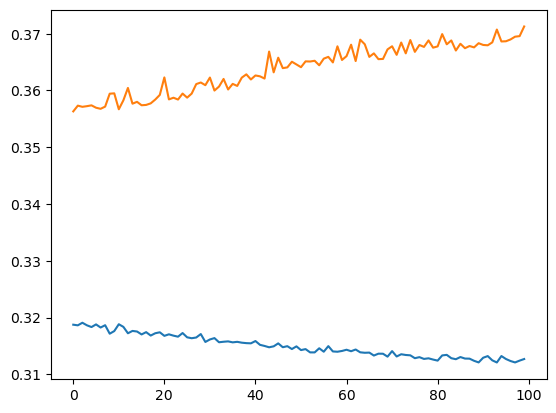

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


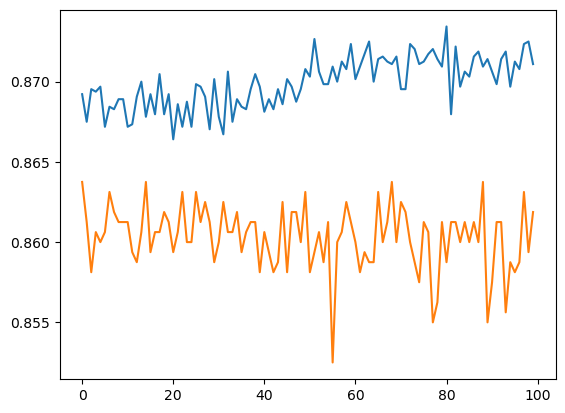

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])